In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

Apply Hough transform (circular objects detection) and blob detection algorithm to detect coins present in image 'coins_1.jfif'. Comment on the outcomes of two methods.

In terms of detecting circular object, without a doubt hough transformation would be better whereas you can detect the circular object based on the radius as opose to the blob detection, no matter how to change the parameters you would still not get the outline of the coin but sometimes getting the gaps on the coin

In [2]:
#hough transform
img = cv.imread('coins_1.jfif')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
gray = cv.GaussianBlur(gray, (7,7), 1.5)

row = img.shape[0]
circles = cv.HoughCircles(gray, cv.HOUGH_GRADIENT, 1, row/8, param1 = 150, param2 = 25)

if circles is not None:
    circles = np.uint8(np.around(circles))
    for i in circles[0]:
        center = (i[0], i[1])
        cv.circle(img, center, 1, (100, 100, 100), 3)
        
        radius = i[2]
        
        cv.circle(img, center, radius, (255, 0, 0), 2)
        
cv.imshow('circle', img)
cv.waitKey(0)
cv.destroyAllWindows()

In [3]:
#blob detection
im = cv.imread('coins_1.jfif')
blur = cv.GaussianBlur(im, (7, 7), 1.5)
gray = cv.cvtColor(blur, cv.COLOR_BGR2GRAY)

# parameters
params = cv.SimpleBlobDetector_Params()
params.filterByArea = False
params.filterByCircularity = False
params.filterByConvexity = False
params.filterByInertia = False

detector = cv.SimpleBlobDetector_create(params)
keypoints = detector.detect(gray)

# Draw detected blobs as circles
blank = np.zeros((1,1))
im_with_keypoints = cv.drawKeypoints(im, keypoints, blank, (0, 0, 255),
                                    cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

cv.imshow("keypoints", im_with_keypoints)
cv.waitKey(0)
cv.destroyAllWindows()

Apply k-means clustering on 'zebra.jfif' to segment out the zebra.

You are required to determine the optimal k by plotting the within cluster sum of squares vs number of clusters (2-10).

Apply the clustering method on 2 color space: 

BGR and HSV and compare the results obtained.

In [14]:
img = cv.imread('zebra.jfif')
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

cv.imshow('result', np.hstack((img, img_rgb)))
cv.waitKey(0)
cv.destroyAllWindows()

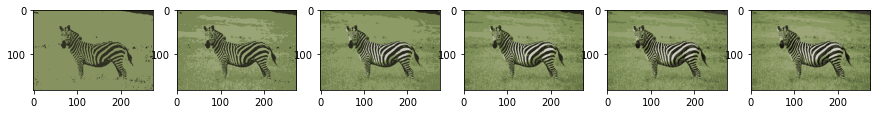

In [8]:
# reshape the image and change the data type
img_reshape = img_rgb.reshape((-1, 3))
img_reshape = np.float32(img_reshape)

criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 10, 1.0)
attempts = 10

# K = 2
ret2, label2, center2 = cv.kmeans(img_reshape, 2, None, criteria, attempts, cv.KMEANS_PP_CENTERS)
center2 = np.uint8(center2)
res2 = center2[label2.flatten()]
seg_res2 = res2.reshape(img_rgb.shape)

# K = 3
ret3, label3, center3 = cv.kmeans(img_reshape, 3, None, criteria, attempts, cv.KMEANS_PP_CENTERS)
center3 = np.uint8(center3)
res3 = center3[label3.flatten()]
seg_res3 = res3.reshape(img_rgb.shape)

# K = 4
ret4, label4, center4 = cv.kmeans(img_reshape, 4, None, criteria, attempts, cv.KMEANS_PP_CENTERS)
center4 = np.uint8(center4)
res4 = center4[label4.flatten()]
seg_res4 = res4.reshape(img_rgb.shape)

# K = 5
ret5, label5, center5 = cv.kmeans(img_reshape, 5, None, criteria, attempts, cv.KMEANS_PP_CENTERS)
center5 = np.uint8(center5)
res5 = center5[label5.flatten()]
seg_res5 = res5.reshape(img_rgb.shape)

# K = 6
ret6, label6, center6 = cv.kmeans(img_reshape, 6, None, criteria, attempts, cv.KMEANS_PP_CENTERS)
center6 = np.uint8(center6)
res6 = center6[label6.flatten()]
seg_res6 = res6.reshape(img_rgb.shape)

# K = 7
ret7, label7, center7 = cv.kmeans(img_reshape, 7, None, criteria, attempts, cv.KMEANS_PP_CENTERS)
center7 = np.uint8(center7)
res7 = center7[label7.flatten()]
seg_res7 = res7.reshape(img_rgb.shape)

plt.figure(figsize = (15,15))
plt.subplot(1,6,1)
plt.imshow(seg_res2)
plt.subplot(1,6,2)
plt.imshow(seg_res3)
plt.subplot(1,6,3)
plt.imshow(seg_res4)
plt.subplot(1,6,4)
plt.imshow(seg_res5)
plt.subplot(1,6,5)
plt.imshow(seg_res6)
plt.subplot(1,6,6)
plt.imshow(seg_res7)
plt.show()

From the above, we can see that the optimal k is 3 you can see that starting from 3 there are no changes to the segmented pictures

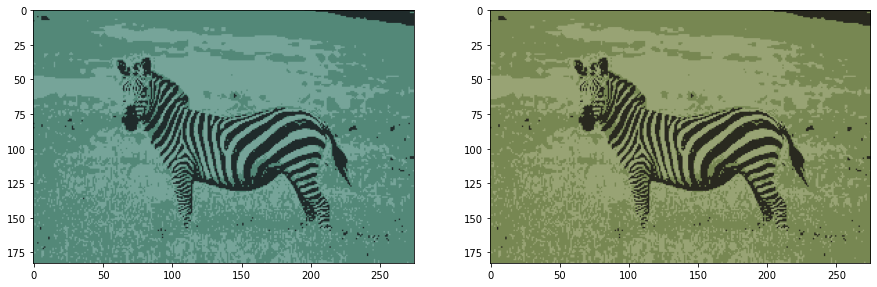

In [15]:
img = cv.imread('zebra.jfif')
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

img_reshape = img.reshape((-1, 3))
img_reshape = np.float32(img_reshape)

img_rgb_reshape = img_rgb.reshape((-1, 3))
img_rgb_reshape = np.float32(img_rgb_reshape)

criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 10, 1.0)
attempts = 10

ret, label, center = cv.kmeans(img_reshape, 3, None, criteria, attempts, cv.KMEANS_PP_CENTERS)
center = np.uint8(center)
res = center[label.flatten()]
seg_res = res.reshape(img.shape)

ret_rgb, label_rgb, center_rgb = cv.kmeans(img_rgb_reshape, 3, None, criteria, attempts, cv.KMEANS_PP_CENTERS)
center_rgb = np.uint8(center_rgb)
res_rgb = center_rgb[label_rgb.flatten()]
seg_res_rgb = res_rgb.reshape(img_rgb.shape)

plt.figure(figsize = (15,15))
plt.subplot(1,2,1)
plt.imshow(seg_res)
plt.subplot(1,2,2)
plt.imshow(seg_res_rgb)
plt.show()

As you can see that both are similar but different background colours, but in terms of preferance hsv is definetely easier to manipulate.